<a href="https://colab.research.google.com/github/tmrb/Visual-analysis-for-quality-prediction/blob/main/Auto_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto-Sklearn

auto-sklearn is an automated machine learning toolkit and a drop-in replacement for a scikit-learn estimator.
It frees a machine learning user from algorithm selection and hyperparameter tuning. It leverages recent advantages in Bayesian optimization, meta-learning and ensemble construction.

[Docu](https://automl.github.io/auto-sklearn/master/),
[Paper](https://papers.nips.cc/paper/5872-efficient-and-robust-automated-machine-learning)

Notebook author: Marius Lindauer ([www.automl.org](https://www.automl.org))

# Installation

The notebook was created based on 
scikit-learn 0.19.2, smac 0.8.0 and auto-sklearn 0.5.1.

In [ ]:
!apt-get install swig -y
!pip install Cython numpy

# sometimes you have to run the next command twice on colab
# I haven't figured out why
!pip install auto-sklearn==0.10.0
#!pip install <auto-sklearn>=<0.10.0>
!pip install pipelineprofiler
!pip install git+https://github.com/oracle/Skater.git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
  Cloning https://github.com/oracle/Skater.git to /tmp/pip-req-build-cikx4rx6
  Running command git clone -q https://github.com/oracle/Skater.git /tmp/pip-req-build-cikx4rx6


In [ ]:
from google.colab import drive
import sys
drive.mount("/content/drive", force_remount=True)
root  = '/content/drive/My Drive/projeto'
sys.path.append(root)

In [ ]:
# ignore some annoying warnings for demonstrating auto-sklearn 
# shouldn't be done in real production
import numpy as np
np.warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

train_new = pd.read_csv('/content/drive/My Drive/projeto/overallprocessed_automl.csv',error_bad_lines=False,sep = ',')
train_new

,Unnamed: 0,Pinholes P,Pinholes M,Pinholes G,Arranhão,Desvio Padrão D.O.,Média D.O.,TotalTime,WarmupTime,CoatingTime,FilmInSpec,ChillDown,PumpdownTime,VentingTime,FilmProcessed,MechOpenTime,Boatlife,FirstProbe,Weight,WebWidth,TargetNumber,WebSpeed,WireSpeed,UnwSetTension,RewSetTension,Situação
0,0,1.12,0.34,0.19,0.04,0.01,2.42,126.030000,11.530000,72.930000,32312.0,95.170000,9.970000,9.130000,36442.0,17.570000,17.280000,3.0,1269.0,2060.0,2.4,500.0,74.0,440.0,195.0,1
1,1,2.65,1.00,0.97,0.38,0.02,2.42,148.530000,17.730000,74.000000,26889.0,106.930000,14.500000,9.530000,36444.0,27.900000,14.570000,3.0,1269.0,2070.0,2.4,500.0,72.5,443.0,196.0,1
2,2,0.66,0.44,0.50,0.40,0.03,2.43,176.300000,17.000000,77.130000,35087.0,106.900000,11.800000,9.870000,36448.0,55.370000,29.650000,3.0,1269.0,2100.0,3.4,350.0,73.0,529.0,254.0,1
3,3,0.76,0.23,0.05,0.00,0.01,3.42,189.970000,10.130000,110.100000,35896.0,131.570000,10.930000,9.170000,36897.0,40.230000,31.670000,3.0,1269.0,2060.0,3.4,350.0,73.0,370.0,311.0,0
4,4,0.78,0.13,0.06,0.01,0.02,3.44,121.770000,4.600000,76.600000,26307.0,91.830000,10.300000,9.570000,26731.0,10.870000,33.750000,3.0,1269.0,2060.0,3.4,350.0,73.0,370.0,311.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,662,2.44,0.46,0.16,0.01,0.01,3.40,166.366669,8.133333,110.166664,35909.0,129.533341,10.666667,3.566667,36350.0,25.466667,5.800000,1.0,1466.0,2390.0,3.4,350.0,73.0,478.0,399.0,1
490,663,0.89,0.27,0.16,0.01,0.02,3.39,167.966659,8.200000,110.133331,36090.0,129.666672,10.700000,3.700000,36345.0,30.833334,3.833333,3.0,1361.0,2070.0,3.4,350.0,73.0,373.0,313.0,1
491,664,0.29,0.19,0.10,0.01,0.01,2.40,208.699997,16.033333,94.500000,35479.0,122.400002,11.333333,6.700000,36482.0,75.433334,1.850000,2.0,1361.0,2200.0,2.4,380.0,55.1,550.0,230.0,1
492,666,0.64,0.10,0.06,0.02,0.01,3.41,178.666672,7.033333,113.199997,35610.0,125.133331,10.333333,2.966667,36445.0,44.566666,11.700000,2.0,1466.0,2330.0,2.4,400.0,62.0,578.0,310.0,1


In [ ]:
train_new = train_new.dropna(axis=1, how = 'all')
train_new = train_new.drop_duplicates()
train_new = train_new.drop(columns=['Unnamed: 0'])

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train_new))
print(z)

[[0.32311055 0.21175867 0.18269002 ... 0.29086893 1.30745815 0.4230811 ]
 [1.17522318 2.5499132  4.58333015 ... 0.32732675 1.29091626 0.4230811 ]
 [0.77358997 0.20667646 1.71149749 ... 1.37245087 0.33148672 0.4230811 ]
 ...
 [1.13593211 0.83941137 0.73261542 ... 1.6276556  0.72849205 0.4230811 ]
 [0.79317603 1.21600299 0.97702671 ... 1.96792856 0.59485904 0.4230811 ]
 [0.26435236 0.49958106 0.36599849 ... 0.09642724 1.32270214 0.4230811 ]]


In [ ]:
threshold = 3
np.where(z > 3)

(array([  0,   1,   1,   1,   2,   4,   6,   8,  21,  21,  21,  23,  26,
         27,  29,  32,  33,  34,  34,  34,  35,  36,  37,  37,  44,  44,
         44,  46,  54,  55,  58,  59,  59,  66,  66,  71,  74,  83,  85,
         97,  99,  99,  99, 104, 106, 107, 111, 111, 114, 120, 124, 124,
        125, 125, 125, 135, 135, 139, 140, 141, 142, 143, 144, 144, 144,
        144, 145, 151, 154, 154, 154, 155, 160, 162, 172, 172, 174, 175,
        176, 179, 194, 194, 198, 198, 220, 242, 242, 250, 252, 252, 257,
        257, 261, 261, 266, 268, 274, 281, 290, 290, 290, 290, 297, 300,
        302, 302, 302, 308, 310, 310, 318, 319, 326, 328, 328, 328, 330,
        330, 331, 331, 338, 345, 345, 355, 355, 358, 359, 360, 364, 364,
        370, 375, 378, 381, 386, 389, 398, 398, 401, 402, 406, 408, 408,
        422, 422, 433, 471, 493]),
 array([20,  2,  3, 20,  3, 13, 13,  0,  0,  1,  2, 12, 20, 20,  9,  4, 20,
         6,  7, 14,  9, 20,  0, 11,  8, 10, 13, 13, 20, 20,  7,  6, 14,  1,
         2

In [ ]:
train_new.shape

(494, 25)

In [ ]:
train_new_drop_outliers = train_new[(z < 3).all(axis=1)]

In [ ]:
train_new_drop_outliers.shape

(392, 25)

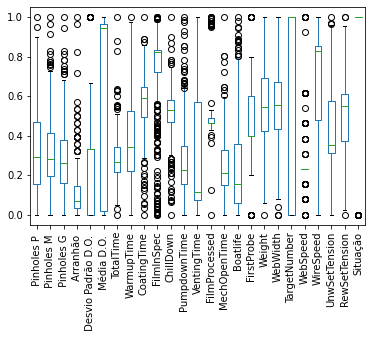

In [ ]:
normalized_df=(train_new-train_new.min())/(train_new.max()- train_new.min())
normalized_df.plot(kind='box', rot=90)

In [ ]:
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

# Load data
y = train_new['Situação']
X = train_new.drop(columns='Situação')
#X, y = sklearn.datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = \
        sklearn.model_selection.train_test_split(X, y, random_state=1, stratify = y)

The accuracy might not be quite state-of-the-art after running auto-sklearn only for two minutes. If you want to achieve better results, please try to increase the time limit `time_left_for_this_task`.

In [ ]:
import random
import autosklearn.classification

random.seed(1)
# configure auto-sklearn
automl = autosklearn.classification.AutoSklearnClassifier(
          time_left_for_this_task=3600, # run auto-sklearn for at most 2min
          per_run_time_limit=60, # spend at most 30 sec for each model training
          )

# train model(s)
automl.fit(X_train,y_train)

# evaluate
y_hat = automl.predict(X_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_hat)
print("Test Accuracy score {0}".format(test_acc))

Test Accuracy score 0.8061224489795918


## Inspect some statistics of our first example

Please note that auto-sklearn has internally used a holdout set of the traning set to estimate the quality of the trained model. Based on this hold-out validation set, auto-sklearn reports a validation score.

In [ ]:
print(automl.sprint_statistics())
#print(automl_ensembles.sprint_statistics())

auto-sklearn results:
  Dataset name: 4bc106c180ab8623371b1a227e2960c2
  Metric: accuracy
  Best validation score: 0.867347
  Number of target algorithm runs: 667
  Number of successful target algorithm runs: 588
  Number of crashed target algorithm runs: 77
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 2



## Inspect Ensemble

Auto-sklearn considers all trained models as potential candidates to build an ensemble out of these.
The following command allows you to see the ensemble.

Since the ensemble does not use a simple majority voting, but a weighted ensemble,
the fomat is the following:

`(ensemble weight, machine learning pipeline)`

In [ ]:
print(automl.show_models())
#print(automl_ensembles.show_models())

[(0.540000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'lda', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'quantile_transformer', 'feature_preprocessor:__choice__': 'select_percentile_classification', 'classifier:lda:n_components': 50, 'classifier:lda:shrinkage': 'None', 'classifier:lda:tol': 1.1100684448598318e-05, 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:n_quantiles': 1358, 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:output_distribution': 'normal', 'feature_preprocessor:select_percentile_classification:percentile': 51.05269076796873, 'feature_preprocessor:select_percentile_classification:score_fun

In [ ]:
automl.sprint_statistics()

'auto-sklearn results:\n  Dataset name: 4bc106c180ab8623371b1a227e2960c2\n  Metric: accuracy\n  Best validation score: 0.867347\n  Number of target algorithm runs: 667\n  Number of successful target algorithm runs: 588\n  Number of crashed target algorithm runs: 77\n  Number of target algorithms that exceeded the time limit: 0\n  Number of target algorithms that exceeded the memory limit: 2\n'

In [ ]:
import PipelineProfiler
data = PipelineProfiler.import_autosklearn(automl)
PipelineProfiler.plot_pipeline_matrix(data)


In [ ]:
listamodelo = []
listametrica = []
for i in range(len(data)):
  listamodelo.append(data[i]['steps'][2]['primitive']['name'])
  listametrica.append(data[i]['scores'][0]['value']) 

In [ ]:
dici = {}
dici['Preprocessamento de variáveis'] = ['Nenhum','Seleção de quantis', 'Amostragem de Nystroem', 'Polinomial', 'Árvores aleatórias integradas', 'Seleção de quantis', 'ICA* rápido','Nenhum','Nenhum', 'Polinomial']
dici['Balanceamento de dados'] = ['Nenhum', 'Nenhum', 'Classe', 'Nenhum', 'Nenhum', 'Nenhum', 'Classe', 'Nenhum','Classe','Classe']
dici['Classificador'] = ['Random Forest', 'LibSVM', 'LDA', 'Passive Agressive', 'Adaboost', 'Adaboost', 'Adaboost', 'QDA','Extra Trees','Random Forest']
dici['Acurácia'] = [0.854, 0.846, 0.837,0.837,0.813,0.813,0.789,0.756,0.756,0.715]

In [ ]:
df = pd.DataFrame(dici)

In [ ]:
"""[0.8455284552845529,
 0.6585365853658537,
 0.7967479674796748,
 0.7073170731707317,
 0.7886178861788617,
 0.6504065040650406,
 0.6178861788617886,
 0.7723577235772358,
 0.7154471544715447,
 0.8455284552845529,
 0.8455284552845529,
 0.0,
 0.0,
 0.8292682926829268,
 0.8292682926829268,
 0.7804878048780488,
 0.8130081300813008,
 0.6260162601626016,
 0.8292682926829268,
 0.6178861788617886,
 0.8373983739837398,
 0.0,
 0.8373983739837398,
 0.8455284552845529,
 0.8455284552845529,
 0.8536585365853658,
 0.46341463414634143,
 0.8455284552845529,
 0.0,
 0.7723577235772358,
 0.15447154471544722,
 0.7073170731707317,
 0.8455284552845529,
 0.7398373983739838,
 0.6422764227642277,
 0.8455284552845529,
 0.0,
 0.8455284552845529,
 0.8455284552845529,
 0.6585365853658537,
 0.8455284552845529,
 0.7967479674796748,
 0.8455284552845529,
 0.8455284552845529,
 0.8455284552845529,
 0.8455284552845529,
 0.8455284552845529,
 0.8455284552845529,
 0.8455284552845529,
 0.0,
 0.7723577235772358,
 0.8455284552845529,
 0.0,
 0.8455284552845529,
 0.8455284552845529,
 0.5365853658536586,
 0.8536585365853658]"""

'[0.8455284552845529,\n 0.6585365853658537,\n 0.7967479674796748,\n 0.7073170731707317,\n 0.7886178861788617,\n 0.6504065040650406,\n 0.6178861788617886,\n 0.7723577235772358,\n 0.7154471544715447,\n 0.8455284552845529,\n 0.8455284552845529,\n 0.0,\n 0.0,\n 0.8292682926829268,\n 0.8292682926829268,\n 0.7804878048780488,\n 0.8130081300813008,\n 0.6260162601626016,\n 0.8292682926829268,\n 0.6178861788617886,\n 0.8373983739837398,\n 0.0,\n 0.8373983739837398,\n 0.8455284552845529,\n 0.8455284552845529,\n 0.8536585365853658,\n 0.46341463414634143,\n 0.8455284552845529,\n 0.0,\n 0.7723577235772358,\n 0.15447154471544722,\n 0.7073170731707317,\n 0.8455284552845529,\n 0.7398373983739838,\n 0.6422764227642277,\n 0.8455284552845529,\n 0.0,\n 0.8455284552845529,\n 0.8455284552845529,\n 0.6585365853658537,\n 0.8455284552845529,\n 0.7967479674796748,\n 0.8455284552845529,\n 0.8455284552845529,\n 0.8455284552845529,\n 0.8455284552845529,\n 0.8455284552845529,\n 0.8455284552845529,\n 0.8455284552845

In [ ]:
"""['random_forest',
 'numerical_transformer',
 'qda',
 'numerical_transformer',
 'numerical_transformer',
 'numerical_transformer',
 'numerical_transformer',
 'numerical_transformer',
 'pca',
 'select_percentile_classification',
 'random_trees_embedding',
 'numerical_transformer',
 'numerical_transformer',
 'polynomial',
 'select_percentile_classification',
 'numerical_transformer',
 'numerical_transformer',
 'numerical_transformer',
 'feature_agglomeration',
 'numerical_transformer',
 'polynomial',
 'numerical_transformer',
 'extra_trees_preproc_for_classification',
 'random_trees_embedding',
 'random_trees_embedding',
 'select_percentile_classification',
 'numerical_transformer',
 'pca',
 'select_percentile_classification',
 'kernel_pca',
 'numerical_transformer',
 'select_rates_classification',
 'numerical_transformer',
 'select_percentile_classification',
 'select_percentile_classification',
 'numerical_transformer',
 'numerical_transformer',
 'random_trees_embedding',
 'numerical_transformer',
 'numerical_transformer',
 'random_trees_embedding',
 'random_trees_embedding',
 'select_percentile_classification',
 'select_percentile_classification',
 'nystroem_sampler',
 'select_percentile_classification',
 'select_percentile_classification',
 'nystroem_sampler',
 'select_percentile_classification',
 'select_percentile_classification',
 'select_percentile_classification',
 'liblinear_svc_preprocessor',
 'numerical_transformer',
 'select_percentile_classification',
 'gradient_boosting',
 'select_percentile_classification',
 'feature_agglomeration',
 'extra_trees_preproc_for_classification',
 'select_percentile_classification',
 'nystroem_sampler',
 'select_percentile_classification',
 'numerical_transformer',
 'numerical_transformer',
 'select_percentile_classification',
 'numerical_transformer',
 'numerical_transformer',
 'numerical_transformer',
 'select_percentile_classification',
 'numerical_transformer',
 'select_percentile_classification',
 'select_percentile_classification',
 'numerical_transformer',
 'numerical_transformer',
 'numerical_transformer',
 'feature_agglomeration',
 'select_percentile_classification']"""

"['random_forest',\n 'numerical_transformer',\n 'qda',\n 'numerical_transformer',\n 'numerical_transformer',\n 'numerical_transformer',\n 'numerical_transformer',\n 'numerical_transformer',\n 'pca',\n 'select_percentile_classification',\n 'random_trees_embedding',\n 'numerical_transformer',\n 'numerical_transformer',\n 'polynomial',\n 'select_percentile_classification',\n 'numerical_transformer',\n 'numerical_transformer',\n 'numerical_transformer',\n 'feature_agglomeration',\n 'numerical_transformer',\n 'polynomial',\n 'numerical_transformer',\n 'extra_trees_preproc_for_classification',\n 'random_trees_embedding',\n 'random_trees_embedding',\n 'select_percentile_classification',\n 'numerical_transformer',\n 'pca',\n 'select_percentile_classification',\n 'kernel_pca',\n 'numerical_transformer',\n 'select_rates_classification',\n 'numerical_transformer',\n 'select_percentile_classification',\n 'select_percentile_classification',\n 'numerical_transformer',\n 'numerical_transformer',\n 'r

In [ ]:
Banco = {}
for i in range(len(data)):
  Banco[data[i]['steps'][2]['primitive']['name']] = []
for i in range(len(data)):
  Banco[data[i]['steps'][2]['primitive']['name']].append(data[i]['scores'][0]['value'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
RandomForest1 = RandomForestClassifier(bootstrap=True,criterion='gini', max_features=0.50, max_leaf_nodes= None,
                                       min_impurity_decrease = 0,min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0)
SVClassifier1 = SVC(C = 940.94, gamma=1.58, kernel='rbf', max_iter=-1, shrinking= False, tol=0.02,probability= True)
LDAClassifier = LDA(n_components=224)
PAClassifier = PassiveAggressiveClassifier(C=0.2575,average=True,tol=0.02307)
ADAboost1 = AdaBoostClassifier(algorithm='SAMME',learning_rate=0.62557, n_estimators=446)
ADAboost2 = AdaBoostClassifier(algorithm='SAMME',learning_rate=0.12805, n_estimators=125)
ADAboost3 = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.03127, n_estimators=496)
QDAClassifier1 = QDA(reg_param=0.56306)
ExtraTree = ExtraTreesClassifier(max_features=0.93390, min_samples_leaf=10,min_samples_split=4)
RandomForest2 = RandomForestClassifier(bootstrap=False,criterion='gini', max_features=0.41113, max_leaf_nodes= None,
                                       min_impurity_decrease = 0,min_samples_leaf=16,min_samples_split=8,min_weight_fraction_leaf=0)

In [ ]:
from sklearn.metrics import f1_score,accuracy_score, average_precision_score,log_loss, recall_score, brier_score_loss, jaccard_score, roc_auc_score
from sklearn.metrics import matthews_corrcoef
from random import seed

seed(3)

models = {          
          'RF1': RandomForest1,
          'SVC':SVClassifier1,
          'LDA': LDAClassifier,
          'PA' : PAClassifier,
          'ADA1': ADAboost1,
          'ADA2': ADAboost2,
          'ADA3': ADAboost3,
          'QDA': QDAClassifier1,
          'EXT': ExtraTree,
          'RF2': RandomForest2,}
f1 = {}
accuracy = {}
matthews = {}
average_precision = {}
brier_loss_ = {}
recall_ = {}
jaccard_ = {}
AUC = {}
results = pd.DataFrame()
for model_key in models:
  model = models[model_key]
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  f1[model_key] = f1_score(y_test, preds)
  accuracy[model_key] = accuracy_score(y_test, preds)
  matthews[model_key] = matthews_corrcoef(y_test,preds)
  average_precision[model_key] = average_precision_score(y_test,preds)
  brier_loss_[model_key] = brier_score_loss(y_test,preds)
  recall_[model_key] = recall_score(y_test,preds)
  jaccard_[model_key] = jaccard_score(y_test,preds)
  AUC[model_key] = roc_auc_score(y_test,preds)
  if model_key != 'PA':
    y_pred = models[model_key].predict_proba(X_test)[:,1]
  else:
    y_pred = models[model_key].predict(X_test)
  if f1[model_key] < 0 :
    f1[model_key] = 0
  if accuracy[model_key] < 0 :
    accuracy[model_key] = 0
  if matthews[model_key] < 0 :
    matthews[model_key] = 0
  # Save results in pandas dataframe object
  results[f"{model_key}"] = y_pred
  print("F1 for {0}: {1}".format(model_key, f1[model_key]))
  print("accuracy for {0}: {1}".format(model_key, accuracy[model_key]))
  print("Matthews correlation coef for {0}: {1}".format(model_key, matthews[model_key]))
  print("Average precision for {0}: {1}".format(model_key, average_precision[model_key]))
  print("Log loss for {0}: {1}".format(model_key, brier_loss_[model_key]))
  print("Recall for {0}: {1}".format(model_key, recall_[model_key]))
  print("Jaccard for {0}: {1}".format(model_key, jaccard_[model_key]))
  results['Situacao'] = y_test.values

F1 for RF1: 0.898876404494382
accuracy for RF1: 0.8163265306122449
Matthews correlation coef for RF1: 0
Average precision for RF1: 0.8422799684236408
Log loss for RF1: 0.1836734693877551
Recall for RF1: 0.963855421686747
Jaccard for RF1: 0.8163265306122449
F1 for SVC: 0.9111111111111111
accuracy for SVC: 0.8367346938775511
Matthews correlation coef for SVC: 0
Average precision for SVC: 0.8453798361973034
Log loss for SVC: 0.16326530612244897
Recall for SVC: 0.9879518072289156
Jaccard for SVC: 0.8367346938775511
F1 for LDA: 0.898876404494382
accuracy for LDA: 0.8163265306122449
Matthews correlation coef for LDA: 0
Average precision for LDA: 0.8422799684236408
Log loss for LDA: 0.1836734693877551
Recall for LDA: 0.963855421686747
Jaccard for LDA: 0.8163265306122449
F1 for PA: 0.9171270718232044
accuracy for PA: 0.8469387755102041
Matthews correlation coef for PA: 0.0
Average precision for PA: 0.8469387755102041
Log loss for PA: 0.15306122448979592
Recall for PA: 1.0
Jaccard for PA: 0.846

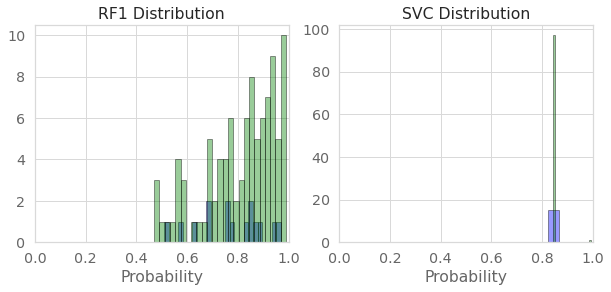

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

sns.set(font_scale = 1.3)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
def probabilities_plot():
  f, ax = plt.subplots(figsize=(10, 4), nrows=1, ncols = 2)
  models_selected = ['RF1','SVC']
  for key, counter in zip(models_selected, range(2)):
    # Get predictions
    y_pred = results[key]
    
    # Get AUC
    auc = roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"
    AUC[key] = auc
    #plt.figure(dpi = 600)

    # Plot false distribution
    false_pred = results[results['Situacao'] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                bins=int(25), color = 'blue',
                hist_kws={'edgecolor':'black'}, ax = ax[counter],)
    
    # Plot true distribution
    true_pred = results[results['Situacao'] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                bins=int(25), color = 'green',
                hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    #ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
    #               verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")
  # Tight layout
    plt.savefig('probability_distribution', dpi=600)
  #plt.savefig('Probability.png')
probabilities_plot()

# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'indice': [0,1,2,3,4,5,6,7,8,9],
'group': ['RF1','SVC','LDA','PA','ADA1','ADA2','ADA3','QDA','EXT','RF2'],
'f1': [f1['RF1'], f1['SVC'],f1['LDA'],f1['PA'],f1['ADA1'],f1['ADA2'],f1['ADA3'],f1['QDA'],f1['EXT'],f1['RF2']],
'accuracy': [accuracy['RF1'], accuracy['SVC'],accuracy['LDA'],accuracy['PA'],accuracy['ADA1'],accuracy['ADA2'],accuracy['ADA3'],accuracy['QDA'],accuracy['EXT'],accuracy['RF2']],
'matthews': [matthews['RF1'], matthews['SVC'],matthews['LDA'],matthews['PA'],matthews['ADA1'],matthews['ADA2'],matthews['ADA3'],matthews['QDA'],matthews['EXT'],matthews['RF2']],
'AUC': [AUC['RF1'], AUC['SVC'], AUC['LDA'], AUC['PA'],AUC['ADA1'],AUC['ADA2'],AUC['ADA3'],AUC['QDA'],AUC['EXT'],AUC['RF2']],
'average_precision':[average_precision['RF1'], average_precision['SVC'],average_precision['LDA'],average_precision['PA'],average_precision['ADA1'],average_precision['ADA2'],average_precision['ADA3'],average_precision['QDA'],average_precision['EXT'],average_precision['RF2']],
'brier_loss_' :[brier_loss_['RF1'], brier_loss_['SVC'],brier_loss_['LDA'],brier_loss_['PA'],brier_loss_['ADA1'],brier_loss_['ADA2'],brier_loss_['ADA3'],brier_loss_['QDA'],brier_loss_['EXT'],brier_loss_['RF2']],
'recall_' : [recall_['RF1'], recall_['SVC'],recall_['LDA'],recall_['PA'],recall_['ADA1'],recall_['ADA2'],recall_['ADA3'],recall_['QDA'],recall_['EXT'],recall_['RF2']],
'jaccard_' : [jaccard_['RF1'], jaccard_['SVC'],jaccard_['LDA'],jaccard_['PA'],jaccard_['ADA1'],jaccard_['ADA2'],jaccard_['ADA3'],jaccard_['QDA'],jaccard_['EXT'],jaccard_['RF2']]
})
 
# ------- PART 1: Create background
def plot_performance(): 
  # number of variable
  categories=list(df)[1:]
  N = len(categories)
  
  # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]
  
  # Initialise the spider plot
  ax = plt.subplot(111, polar=True)
  
  # If you want the first axis to be on top:
  ax.set_theta_offset(pi / 2)
  ax.set_theta_direction(-1)
  
  # Draw one axe per variable + add labels labels yet
  plt.xticks(angles[:-1], categories)
  
  # Draw ylabels
  ax.set_rlabel_position(0)
  plt.yticks([0.25,0.50,0.75,1.0], ["0.25","0.50","0.75", "1.0"], color="black", size=20)
  plt.ylim(0,1)
  
  
  # ------- PART 2: Add plots
  
  # Plot each individual = each line of the data
  # I don't do a loop, because plotting more than 3 groups makes the chart unreadable
  
  # Ind1
  values=df.loc[0].drop('group').values.flatten().tolist()
  values += values[:1]
  ax.plot(angles, values, linewidth=2, linestyle='solid', label="SVC")
  ax.fill(angles, values, 'b', alpha=0.1)

  # Ind4
  values=df.loc[3].drop('group').values.flatten().tolist()
  values += values[:1]
  ax.plot(angles, values, linewidth=2, linestyle='solid', label="RF")
  ax.fill(angles, values, 'r', alpha=0.2)
  
  # Add legend
  plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('probability_distribution', dpi=600)

#plot_performance()

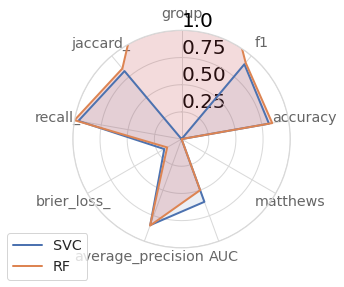

In [ ]:
plot_performance()

In [ ]:
!pip install shap

     |████████████████████████████████| 356 kB 14.7 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491663 sha256=da8f669c3c2ec708ece4f568595999b83005e9606213127e5a1dfcd85a9e6296
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


2021-08-09 17:22:42,618 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[24/24] features ████████████████████ Time elapsed: 2 seconds

2021-08-09 17:22:45,701 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[24/24] features ████████████████████ Time elapsed: 1 seconds

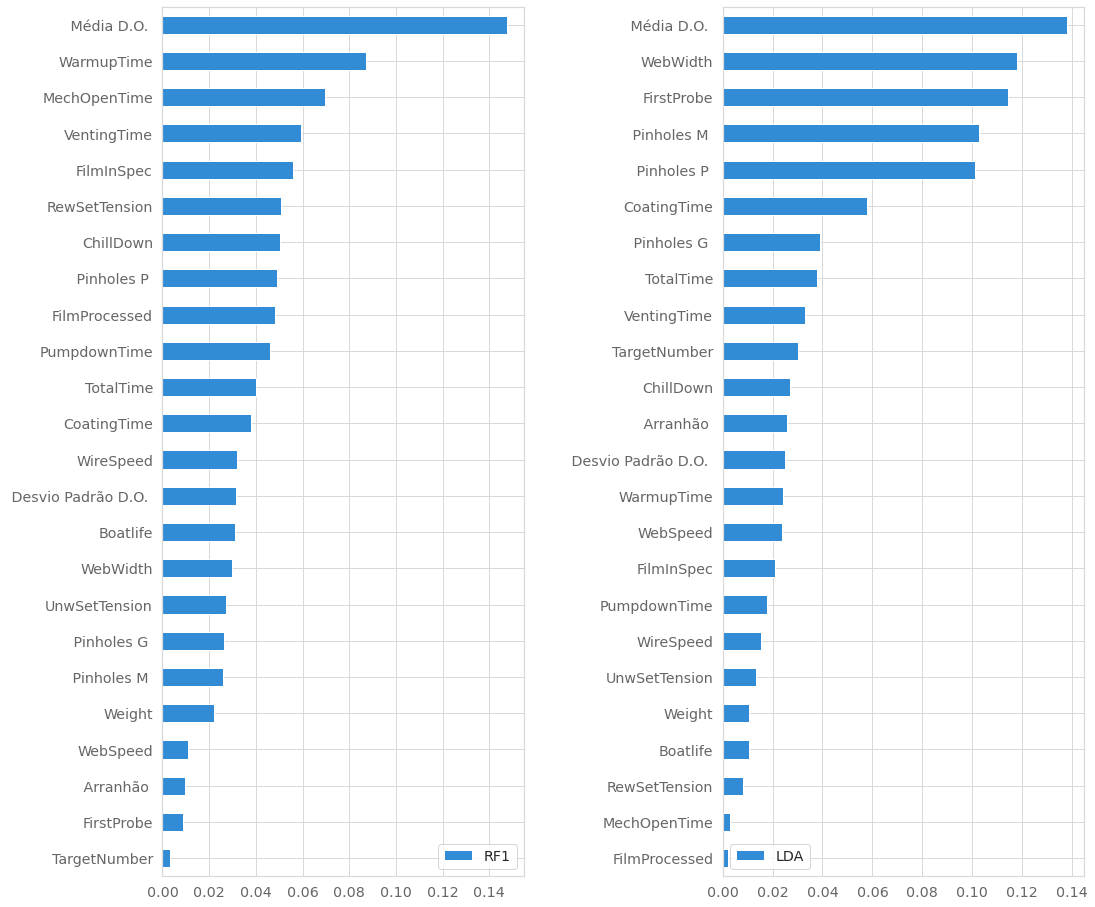

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import skater
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

ax, axes = plt.subplots(1,2, figsize = (16, 16))
plt.subplots_adjust(left=0.1,wspace=0.55)

ax_dict = {
    'RF1':axes[0],
    'LDA':axes[1]
}
labels = list(ax_dict.keys())
data = np.array(list(ax_dict.values()))
category_colors = plt.get_cmap('RdYlGn')(np.linspace(1, 2, data.shape[0]))

interpreter = Interpretation(X_train, feature_names=X_train)
from matplotlib.pyplot import colorbar
models_selection = ['RF1','LDA']

for model_key in models_selection:
  pyint_model = InMemoryModel(models[model_key].predict_proba, examples=X_train,target_names=True)
  ax = ax_dict[model_key]
  values = interpreter.feature_importance.plot_feature_importance(pyint_model, ax=ax, ascending = True)
  ax.legend([model_key])
  
#for tick in ax.yaxis.get_major_ticks():
#    tick.label.set_fontsize(20) 
#for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(15)
#plt.yticks(fontsize =20)
#plt.xticks(fontsize =15)
ax.plot(dpi = 600)

ax.figure.savefig('features_importance.png', dpi = 600)


In [ ]:
import shap


# load JS visualization code to notebook
shap.initjs()
#model = RandomForest1.fit(X_train,y_train)
explainer1 = shap.TreeExplainer(RandomForest1)
shap_values1 = explainer1.shap_values(X_train)
explainer2 = shap.LinearExplainer(LDAClassifier,X_train)
shap_values2 = explainer2.shap_values(X_train)
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer1.expected_value[1], shap_values1[0], X_train, show=False)

ModuleNotFoundError: ignored

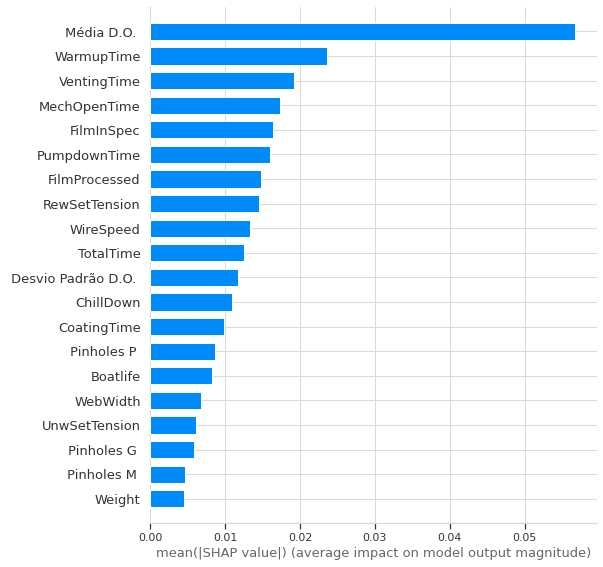

In [ ]:
shap.summary_plot(shap_values1[1],feature_names=X_train.columns,title='RF1',plot_type='bar')
ax.figure.savefig('features_importance.png', dpi = 600)

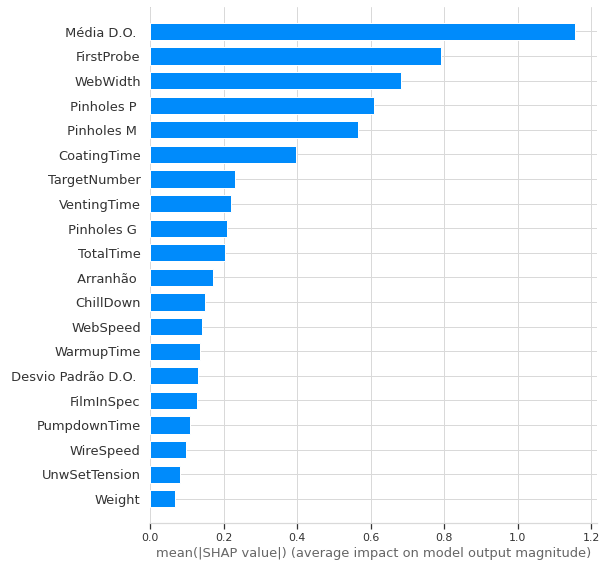

In [ ]:
shap.summary_plot(shap_values2,feature_names=X_train.columns,title='RF1',plot_type='bar')

In [ ]:
import plotly.express as px
import param
import panel as pn
import json

class RatingsDashboard(param.Parameterized):
  def probabilites_plot(self):
    plt.close()
    return pn.pane.Matplotlib(probabilities_plot())

  def performance_plot(self):
    ax = plot_performance()
    plt.close()
    return ax

  def dispersion_plot(self):
    plt.close()
    return shap.summary_plot(shap_values1,X)

  def predictions_plot(self):
    ax =  shap.force_plot(explainer.expected_value, shap_values1, X)
    plt.close()
    return ax
  
  def parallel_plot(self):
    ax = px.parallel_coordinates(X, color = y, dimensions = ['VentingTime','WarmupTime','WireSpeed',' Média D.O. '], color_continuous_scale= ['rgb(255, 0, 0)', 'rgb(201, 219, 216)'],)
    return ax
                          
  def example_explainer(self,value):
    exp = LimeTabularExplainer(X_train.values, 
                           feature_names=X.columns, 
                           discretize_continuous=True, 
                           class_names=['Reprovado', 'Aprovado'])
    plt.close()
    return exp.explain_instance(X_train.iloc[value].values, models['RF1'].predict_proba).show_in_notebook()

rd = RatingsDashboard()

In [ ]:
X.columns

Index([' Pinholes P ', ' Pinholes M ', ' Pinholes G ', ' Arranhão ',
       ' Desvio Padrão D.O. ', ' Média D.O. ', 'TotalTime', 'WarmupTime',
       'CoatingTime', 'FilmInSpec', 'ChillDown', 'PumpdownTime', 'VentingTime',
       'FilmProcessed', 'MechOpenTime', 'Boatlife', 'FirstProbe', 'Weight',
       'WebWidth', 'TargetNumber', 'WebSpeed', 'WireSpeed', 'UnwSetTension',
       'RewSetTension'],
      dtype='object')

In [ ]:
import plotly.graph_objects as go
fig = rd.parallel_plot()
fig.show()

In [ ]:
!pip install kaleido

     |████████████████████████████████| 79.9 MB 50 kB/s 


In [ ]:
from kaleido.scopes.plotly import PlotlyScope
import plotly.graph_objects as go
scope = PlotlyScope()

with open("figure.png", "wb") as f:
    f.write(scope.transform(fig, format="png"))

ModuleNotFoundError: ignored

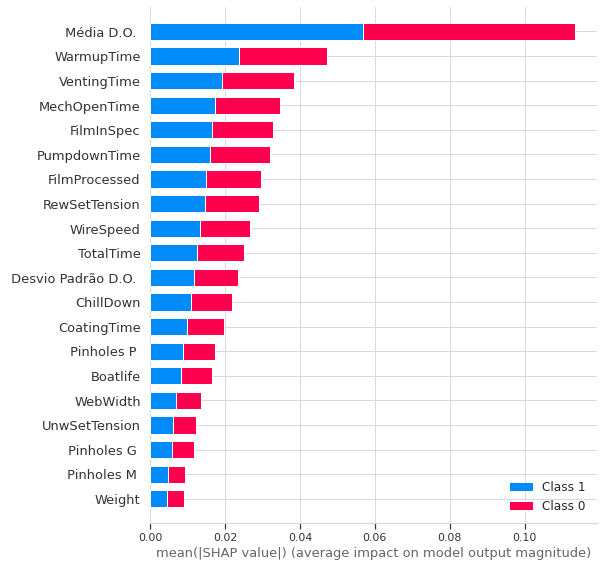

<Figure size 432x288 with 0 Axes>

In [ ]:
rd.dispersion_plot()
plt.savefig("dispersion.png")

In [ ]:
def example_explainer():
    exp = LimeTabularExplainer(X_train.values, 
                           feature_names=X.columns, 
                           discretize_continuous=True, 
                           class_names=['Disapproved', 'Approved'], verbose = True)
    
    return exp

In [ ]:
fig = rd.example_explainer(2)
#fig.explain_instance(X_test.iloc[2].values, models['RF1'].predict_proba).show_in_notebook()

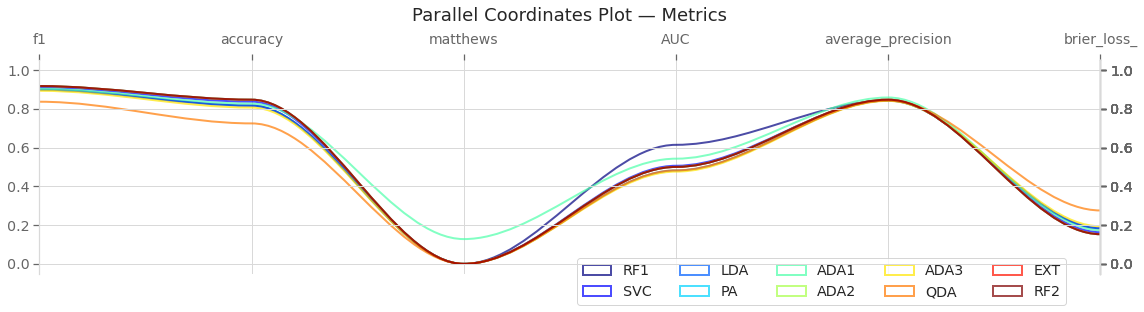

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib.colors as colors
import numpy as np
from sklearn import datasets
#iris = datasets.load_iris()
iris = df.drop(columns=['indice','group'])
ynames = iris.columns
ys = iris.values
ymins = 0
ymaxs = np.ones((ys.shape[1],))
dys = ymaxs - ymins
ymins -= dys * 0.05  # add 5% padding below and above
ymaxs += dys * 0.05

#ymaxs[1], ymins[1] = ymins[1], ymaxs[1]  # reverse axis 1 to have less crossings
dys = ymaxs - ymins

# transform all data to be compatible with the main axis
zs = np.zeros_like(ys)
zs[:, 0] = ys[:, 0]
zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

fig, host = plt.subplots(figsize=(16,4))

axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if ax != host:
        ax.spines['left'].set_visible(False)
        ax.yaxis.set_ticks_position('right')
        ax.spines["right"].set_position(('axes',1))
        #ax.spines['right'].set_visible(False)

#host.set_xlim(0, ys.shape[0])
host.set_xticks(range(ys.shape[1]-2))
host.set_xticklabels(ynames, fontsize=14)
host.tick_params(axis='x', which='major', pad=7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()
host.set_title('Parallel Coordinates Plot — Metrics', fontsize=18, pad=12)
values = range(10)
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = plt.cm.ScalarMappable(norm=cNorm, cmap=jet)
legend_handles = [None for _ in df.group]
for j in range(ys.shape[0]):
      # create bezier curves
      verts = list(zip([x for x in np.linspace(0, ys.shape[1] - 1, ys.shape[1] * 3 - 2)],
                      np.repeat(zs[j,:], 3)[1:-1]))
      codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
      path = Path(verts, codes)
      patch = patches.PathPatch(path, facecolor='none', lw=2, alpha=0.7, edgecolor= scalarMap.to_rgba(values[j]))
      legend_handles[np.array(df.indice[j])] = patch
      host.add_patch(patch)
plt.tight_layout()
host.legend(legend_handles, df.group,
            loc='lower left', bbox_to_anchor=(0.5, -0.18),
            ncol=5)
plt.show()
plt.savefig('parallel_plot1.png', dpi = 600)